In [6]:
import numpy as np
import matplotlib.pyplot as plt
import dwave_networkx as dnx
from dwave.system.samplers import DWaveSampler

In [5]:
dwave_sampler_pegasus = DWaveSampler(solver={'topology__type': 'pegasus'})
props_pegasus = dwave_sampler_pegasus.properties

# Get total qubits - should be 24 * N * (N - 1)
total_qubits = props_pegasus['num_qubits']
print('total qbits = ', total_qubits)

# Get total number of inactive qubits
total_inactive = [i for i in range(total_qubits) if i not in dwave_sampler_pegasus.nodelist]
print('total inactive qbits = ', len(total_inactive))

# another way to compute the number of active qubits
active_qubits = dwave_sampler_pegasus.solver.num_active_qubits
print('active qbits, another way = ', active_qubits)

# This should convert the known inactive qubit indices to Pegasus coordinates.
inactive_pegasus_coord = [dnx.pegasus_coordinates(16).linear_to_pegasus(k) for k in total_inactive]
print('inactive qbits cords', inactive_pegasus_coord)

total qbits =  5760
total inactive qbits =  133
active qbits, another way =  5627
inactive qbits cords [(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 0, 2), (0, 0, 0, 3), (0, 0, 0, 4), (0, 0, 0, 5), (0, 0, 0, 6), (0, 0, 0, 7), (0, 0, 0, 8), (0, 0, 0, 9), (0, 0, 0, 10), (0, 0, 0, 11), (0, 0, 0, 12), (0, 0, 0, 13), (0, 0, 0, 14), (0, 0, 1, 0), (0, 0, 1, 1), (0, 0, 1, 2), (0, 0, 1, 3), (0, 0, 1, 4), (0, 0, 1, 5), (0, 0, 1, 6), (0, 0, 1, 7), (0, 0, 1, 8), (0, 0, 1, 9), (0, 0, 1, 10), (0, 0, 1, 11), (0, 0, 1, 12), (0, 0, 1, 13), (0, 0, 1, 14), (0, 3, 0, 2), (0, 6, 8, 10), (0, 7, 5, 3), (0, 11, 5, 0), (0, 15, 10, 0), (0, 15, 10, 1), (0, 15, 10, 2), (0, 15, 10, 3), (0, 15, 10, 4), (0, 15, 10, 5), (0, 15, 10, 6), (0, 15, 10, 7), (0, 15, 10, 8), (0, 15, 10, 9), (0, 15, 10, 10), (0, 15, 10, 11), (0, 15, 10, 12), (0, 15, 10, 13), (0, 15, 10, 14), (0, 15, 11, 0), (0, 15, 11, 1), (0, 15, 11, 2), (0, 15, 11, 3), (0, 15, 11, 4), (0, 15, 11, 5), (0, 15, 11, 6), (0, 15, 11, 7), (0, 15, 11, 8), (0, 15, 11, 9), (0,

Text(0.5, 1.0, 'Pegasus P2')

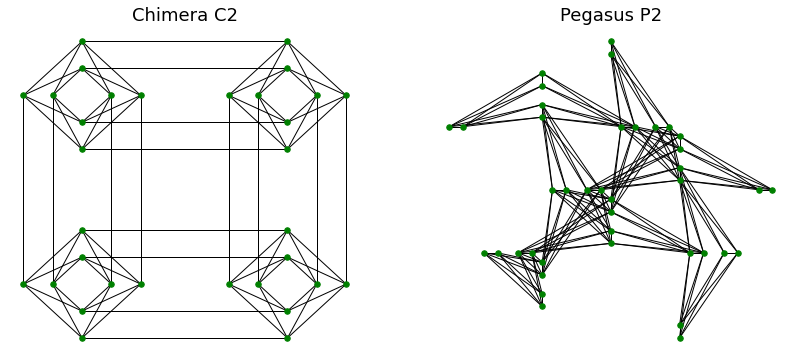

In [7]:
%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(14,6))

dnx.draw_chimera(dnx.chimera_graph(2), ax=ax[0], node_size=30, node_color='g')
ax[0].set_title('Chimera C2', fontsize=18)

dnx.draw_pegasus(dnx.pegasus_graph(2), ax=ax[1], node_size=30, node_color='g')
ax[1].set_title('Pegasus P2', fontsize=18)

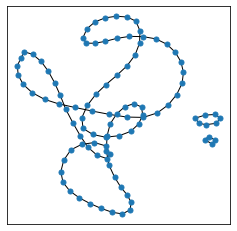

In [10]:
from embed_by_dwave import random_graph
import networkx as nx
import dimod 

G = random_graph(nodes=100, edges=2)

In [13]:
from embed_by_dwave import try_embedding
import minorminer

chimera_full = dnx.chimera_graph(16)
pegasus_full = dnx.pegasus_graph(16)

topologies_full = {'Chimera': chimera_full, 'Pegasus': pegasus_full}

try_embedding(source_graph=G, target_graphs=topologies_full, timeout=20, tries=2)

Chimera: found embedding with longest chain of 2 qubits.
Pegasus: found embedding with longest chain of 1 qubits.


{'Chimera': 2, 'Pegasus': 1}


Problem 1 of 2 for 10 nodes and 5 edges:


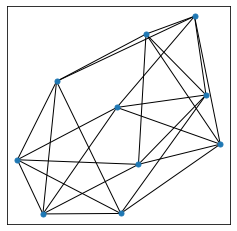

Chimera: found embedding with longest chain of 3 qubits.
Pegasus: found embedding with longest chain of 2 qubits.

Problem 2 of 2 for 10 nodes and 5 edges:


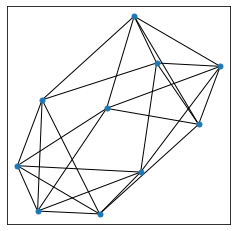

Chimera: found embedding with longest chain of 3 qubits.
Pegasus: found embedding with longest chain of 2 qubits.


[[10, 5, 0, {'Chimera': 3, 'Pegasus': 2}],
 [10, 5, 1, {'Chimera': 3, 'Pegasus': 2}]]

In [15]:
from embed_by_dwave import embedding_loop
import pandas as pd

embedding_loop(nodes=10,   # Additional configuration parameters are demonstrated below
               edges=5, 
               target_graphs=topologies_full)  

In [16]:
import os

from dwave.system.samplers import DWaveSampler
from dwave.cloud.exceptions import *

try:
    qpu_advantage = DWaveSampler(solver={'topology__type': 'pegasus'})
    qpu_2000q = DWaveSampler(solver={'topology__type': 'chimera'})
    
    qpus = {'Advantage': qpu_advantage, 'DW-2000Q': qpu_2000q}

    print("Connected to Advantage {} and 2000Q {}.".format(qpu_advantage.solver.id, qpu_2000q.solver.id))
except SolverNotFoundError:
    print("Currently a pair of solvers are unavailable for sections comparing QPU technologies. Try those examples later.")

Connected to Advantage Advantage_system4.1 and 2000Q DW_2000Q_6.


In [18]:
for qpu in qpus:
    topology = pegasus_full if qpu=="Advantage" else chimera_full
    qpu_yield = 100-round(100*(len(topology.nodes) - len(qpus[qpu].nodelist))/len(topology.nodes), 2)
    
    print("{} has a working graph with {}% yield.".format(qpus[qpu].solver.name, qpu_yield))

Advantage_system4.1 has a working graph with 99.77% yield.
DW_2000Q_6 has a working graph with 99.66% yield.


# First, functions to convert M-QAM symbols into binary

Every element in the message $\mathbf{s}$ of a $\lvert\Omega\rvert$-QAM constellation can be written as:

\begin{equation}
    s_j = \sum_{i=1}^{r_b} 2^{r_b - i + 1} q_{j + (i-1)N} - (\sqrt{\lvert\Omega\rvert} - 1),
\end{equation}

with  $r_b = \lceil\log\sqrt{\lvert\Omega}\rvert\rceil$ number of qubits 

In [ ]:
## SIDE NOTE: I don't need this actually

def QAM_to_Bin(s, order):
    """Take message 's' and convert it's elements into binary (QUBO) representation.
    Inputs:
        s : message; array of constellation symbols.
        order: QAM size.
        
    Returns:
        s_bin : binary rep of each element of s as an array of coefficients of each qubit.
    """
    
    # number of qubits per symbol
    num_qubits = np.ceil(np.log(np.sqrt(order)))
    
    # prepare output array
    s_bin = np.zeros((len(s), num_qubits))
    
    return s_bin

# Actually, we just need the overall coeffs.

## Minimising EVM:

After the message $\mathbf{s}$ is precoded into the precoded vector $\mathbf{x}$, we wirelessly transmit $F^\dagger\mathbf{x}$. This signal picks up environenmental artifacts, modeled by the channel matrix $H$ and so the received signal is a convolution of $H$ and the transmitted signal. After the reciever applies DFT, it reads $H\mathbf{x}$. As $H$ should only model the multipath environment, we may also model-in additional Gaussian noise $\mathbf{n}$ to the recieved vector, i.e. the receiver reads:

\begin{equation}
    H\mathbf{x} + \mathbf{n}
\end{equation}

We would like this to be as similar to the original $\mathbf{s}$ as possible, hence minimising:

\begin{equation}
    \Vert H\mathbf{x} + \mathbf{n} - \mathbf{s}\Vert_2^2
\end{equation}

In [50]:
def Channel_Rayleigh(no_users, no_transmit, scale=None):
    """Returns a random, complex Rayleigh fading wireles channel 
    matrix of size (no_users, no_transmit). 
    
    'no_users = NK and no_transmit = NM', but N can really be set to 1.
    
    NOTE: For testing, specify seed globally when calling this.
    """
    
    if scale is None:
        scale = 1
    else:
        None
    
    re_H = np.random.rayleigh(scale, (no_users, no_transmit))
    im_H = np.random.rayleigh(scale, (no_users, no_transmit))
    
    H = re_H + im_H*1J
    
    return H

def Gauss_noise(length, scale=None):
    
    if scale is None:
        scale=0.1
    else:
        None
    
    noise_re = np.random.normal(loc = 0, scale = np.sqrt(scale/2), size = (length,))
    noise_im = np.random.normal(loc = 0, scale = np.sqrt(scale/2), size = (length,))
    
    noise = noise_re + noise_im * 1j
    
    return noise


In [27]:
def Get_EVM_coeffs(s):

    
    
    return coeffs

In [46]:
N_0 = 1
nt = 10
np.random.normal(loc = 0, scale = np.sqrt(N_0/2), size = (nt,))

array([0.2229122 , 0.25991533, 0.99017198, 0.84644107, 2.07001009,
       0.87079966, 1.83181531, 1.22901961, 1.18170096, 1.4958665 ])